# (My) Scientific Python Toolbox








**Ariel Rossanigo**


### About me

* Ariel Rossanigo
* Artificial Intelligence Professor at UCSE-DAR
* Developer, Data Scientist



### Motivation

*Often people ask me about what I do and immmediatly the conversation turns to questions like:*

* Python? It's helpful for that?
* Isn't slowly?
* Why you don't use [put some knowed name here]?
* **What it's needed to do that?**


### Goals

* Share why Python and desmistify the **scientific** side
* Show the tools I use with some examples


### Why scientific?

* These are tools commonly related to scientific projects, but...
* **Everyone can take advantage of them**

#### What a scientific do?

* Process and visualize data
* Propose hypotheses and models
* Make predictions with the model and validate the hypotheses
* Communicate results

#### What a scientific needs?

* An easy programming language...
* With tools that simplify his job...
* Fast to develop and execute...
* Able to be deployed in production...

### Why Python?

* It's the language I know since many years...


### Why Python?

* It's the language I know since many years... and nothing made me change the election...
* Enables you to make almost everything... 
* Open source and free - Licence can be summarize as *Do whatever you want*
* **Lot of scientific tools** 
* **Enables to prototype models and deploy these in production environments**
* It's **slow** but every tool for heavy duty it's implemented in something faster...


## (My) Scientific Python Toolbox

* IPython + **Jupyter notebook** + **RISE**  
* Numpy +  SciPy                  
* **Pandas**     
* bokeh          
* **Matplotlib** 
* seaborn        
* **sklearn**    
* keras          
* tensorflow     

*All these apart from the normal: virtualenv, pip, git, etc...*

#### IPython 

* python interactive interpreter with steroids
* kernel for Jupyter notebook

#### Jupyter notebook

* Project Jupyter was born out of the IPython Project in 2014 as it evolved to support interactive data science and scientific computing across all programming languages.

* The notebook it's an interactive interpreter with a web interface that it's composed as a secuence of cells, where everyone can be of different types, for example: code, videos, images, markdown, graphs... even latex...

$$c = \sqrt{a^2 + b^2}$$


#### RISE (Reveal.js Ipython Slideshow Extension)

* Notebook extension to make presentations (like this one)
* The presentation is executable

In [2]:
for x in range(2):
    print('Hola a todas!')

Hola a todas!
Hola a todas!


### Numpy

* Multidimensional arrays implemented in an eficient way
* It's the cornerstone of almost every scientific Python tool

### SciPy library

* Provides many user-friendly and efficient numerical routines for different topics, ie:

 * signal: signal processing
 * stats: probability distributions and statistical functions.
 * sparse: 2-D sparse matrix package
 * ...


### Pandas (Python Data Analysis Library)

* The *de facto* tool to work with data in Python
* Use numpy behind the scenes but...
 * propose cooler abstractions like Series and Dataframes
 * allows data manipulation in a SQL way

Let's see what we can do with the tools showed so far with an example...


### The example: Netflix prize (2009)

* 1MM USD for the winner
* 17.770 movies (these are listed in a text file named movie_titles.txt)
* 480.000 users
* **100.480.507 votations** distributed in 17.770 text files

#### Challenge goal

*Create a model to predict user predictions for some movies not in data*

#### Our goal

*Show the things we can do with the tools previously showed*

**Reading a csv**

In [3]:
from IPython.display import display
import numpy as np
import pandas as pd
from utils import data_path # this is a function to simplify path management

movies = pd.read_csv(data_path('movie_titles.txt'), 
                     names=['movie_id', 'year_of_release', 'title'], 
                     index_col='movie_id',
                     encoding='latin-1')

print("Number of movies: {:,}".format(len(movies)))
movies.head()

Number of movies: 17,770


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


**Some operations with Pandas**

In [7]:
# aggregations 
first_year = movies.year_of_release.min()
print("First year a release was made: {}".format(first_year))

# filtering the movies that were released that year
(movies[movies.year_of_release==first_year])

# movies from this millennium that have Monty in their name
(movies[(movies.year_of_release >= 2000) & 
               (movies.title.str.contains('Monty'))])

First year a release was made: 1896.0


,year_of_release,title
movie_id,,
3150,2000.0,Monty Python: The Life of Python
9961,2001.0,Monty Python Live!


In [8]:
# What king of magic do that filter ??...
# display(movies[(movies.year_of_release >= 2000) & (movies.title.str.contains('Monty'))])

display((movies.year_of_release >= 2000).head())

movie_id
1     True
2     True
3    False
4    False
5     True
Name: year_of_release, dtype: bool

### Reading some votes from a pickle

In [9]:
all_ratings = pd.read_pickle(data_path('ratings.pkl'))
print('number of ratings: {:,}'.format(len(all_ratings)))
all_ratings.head()

number of ratings: 5,331,219


,cust_id,stars,date,movie_id
0,1074029,5,2004-09-22,10347
1,101470,4,2005-02-22,10347
2,2257304,3,2005-03-12,10347
3,1700914,5,2005-05-15,10347
4,2491255,5,2005-11-04,10347


#### 5 MM registers... quickly enough....

####  What about the RAM consumption?

In [10]:
all_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5331219 entries, 0 to 435
Data columns (total 4 columns):
cust_id     int64
stars       int64
date        datetime64[ns]
movie_id    int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 203.4 MB


### What happens if we want to show movies data along with votes?

In [11]:
# something like a SQL join
all_together = pd.merge(movies, all_ratings, left_index=True, 
                        right_on='movie_id')

print('Number of ratings: {:,}'.format(len(all_together)))
display(all_together.head())

Number of ratings: 5,331,219


,year_of_release,title,cust_id,stars,date,movie_id
0,1988.0,Neil Diamond: Greatest Hits Live,862622,4,2004-10-15,15
1,1988.0,Neil Diamond: Greatest Hits Live,1513144,2,2005-05-02,15
2,1988.0,Neil Diamond: Greatest Hits Live,698624,3,2005-07-19,15
3,1988.0,Neil Diamond: Greatest Hits Live,1787269,5,2004-02-06,15
4,1988.0,Neil Diamond: Greatest Hits Live,1048253,3,2005-05-23,15


#### Top 10 Most voted movies

In [12]:
top_10 = (all_together.groupby(['movie_id', 'title']).movie_id
                      .count()
                      .sort_values(ascending=False)
                      .head(10))
display(top_10)

movie_id  title                 
16377     The Green Mile            181425
3860      Bruce Almighty            160453
2782      Braveheart                135600
4640      Rain Man                  122157
30        Something's Gotta Give    118412
10550     Cold Mountain             115584
14574     You've Got Mail           110437
15471     Phone Booth               103073
313       Pay It Forward             99811
1470      Bend It Like Beckham       98695
Name: movie_id, dtype: int64

#### Number of movies released by year

In [14]:
by_year = movies.groupby(movies.year_of_release).size().sort_index()
display(by_year.head())

year_of_release
1896.0    1
1909.0    1
1914.0    2
1915.0    5
1916.0    4
dtype: int64

**This doesn't say so much...**

### One image is worth a thousand numbers...

**Matplotlib**

* Most used package for 2D plots in Python
* Syntax mode similar to Matlab 
* Graphs can be included in the notebook
* Integration with Pandas

Apart from Matplotlib exists others like **bokeh**, **seaborn** and much more...

#### Number of movies released by year

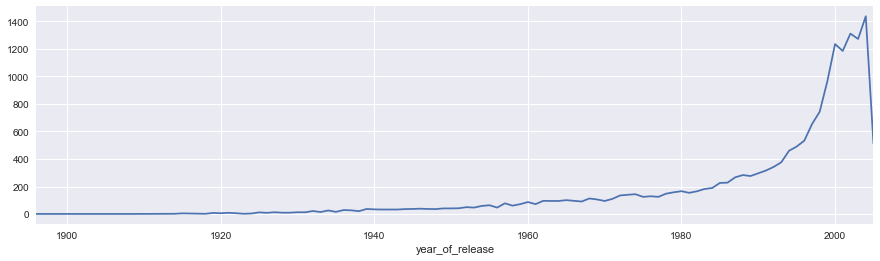

In [15]:
%matplotlib inline
import matplotlib
# seaborn import change the style
import seaborn as sns
# default size for graphs
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

by_year.plot();

#### Movies and votes

stars = pd.crosstab([all_together.movie_id, all_together.title], 
                    all_together.stars)
stars.columns = list(map(str, stars))
stars.head()

#### Expresed in percentage... (normalized)

In [17]:
normalized = stars.div(stars.sum(axis=1), axis=0)
normalized.head()

,,1,2,3,4,5
movie_id,title,,,,,
15,Neil Diamond: Greatest Hits Live,0.103806,0.121107,0.304498,0.332180,0.138408
30,Something's Gotta Give,0.021577,0.064132,0.266198,0.427068,0.221025
41,Horror Vision,0.532609,0.326087,0.130435,0.000000,0.010870
59,Sex and the Beauties,0.137931,0.211823,0.438424,0.147783,0.064039
60,The Libertine,0.336735,0.323129,0.224490,0.081633,0.034014


### How we can separate the goods and the bads?

### sklearn (Machine learning in Python)

* Have almost everything related to machine learning in Python
 * Preprocessing
 * Clasification y Regression
 * Clustering
 * Dimentionality reduction
 * Metrics

* Build over NumPy, SciPy y matplotlib

### How we can separate the goods and the bads?


In [18]:
from sklearn.cluster import KMeans
model = KMeans(3, random_state=1) # 3 groups, random's seed fixed in this examples
model.fit(normalized)
labels = model.predict(normalized)
display(labels[:5])
display(normalized[:5])

array([2, 1, 0, 2, 0], dtype=int32)

,,1,2,3,4,5
movie_id,title,,,,,
15,Neil Diamond: Greatest Hits Live,0.103806,0.121107,0.304498,0.332180,0.138408
30,Something's Gotta Give,0.021577,0.064132,0.266198,0.427068,0.221025
41,Horror Vision,0.532609,0.326087,0.130435,0.000000,0.010870
59,Sex and the Beauties,0.137931,0.211823,0.438424,0.147783,0.064039
60,The Libertine,0.336735,0.323129,0.224490,0.081633,0.034014


In [19]:
film_ratings = ['Bad', 'Good', 'Neutral']
normalized['group'] = 'Bad'
normalized.loc[labels==1, 'group'] = 'Good'
normalized.loc[labels==2, 'group'] = 'Neutral'
normalized.head()

,,1,2,3,4,5,group
movie_id,title,,,,,,
15,Neil Diamond: Greatest Hits Live,0.103806,0.121107,0.304498,0.332180,0.138408,Neutral
30,Something's Gotta Give,0.021577,0.064132,0.266198,0.427068,0.221025,Good
41,Horror Vision,0.532609,0.326087,0.130435,0.000000,0.010870,Bad
59,Sex and the Beauties,0.137931,0.211823,0.438424,0.147783,0.064039,Neutral
60,The Libertine,0.336735,0.323129,0.224490,0.081633,0.034014,Bad


#### How we can show something that represents the groups?

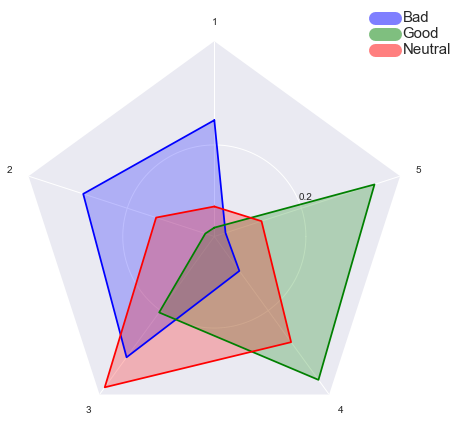

In [20]:
import radar  # auxiliary  functi onality to make the graph

df = pd.DataFrame(model.cluster_centers_)
df.columns=[str(x+1) for x in range(5)]
radar.plot_radar(df, df.columns, 
                 legends=[film_ratings[x] for x in df.index]) 

### What if we want to show not only the centers?

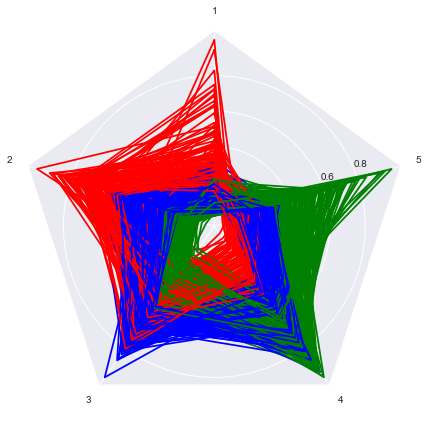

In [21]:
d = normalized[:500].copy()
d['color'] = 'g' 
d.loc[d.group=='Bad', 'color']  = 'r'
d.loc[d.group=='Neutral', 'color'] = 'b'
radar.plot_radar(d, titles=[str(x+1) for x in range(5)], colors=d.color, normalize=True, fill=False)

**Doesn't make much sense...** 

#### What happens if we keep only with the qualification that have more quantity of votes 

In [22]:
normalized.head()

,,1,2,3,4,5,group
movie_id,title,,,,,,
15,Neil Diamond: Greatest Hits Live,0.103806,0.121107,0.304498,0.332180,0.138408,Neutral
30,Something's Gotta Give,0.021577,0.064132,0.266198,0.427068,0.221025,Good
41,Horror Vision,0.532609,0.326087,0.130435,0.000000,0.010870,Bad
59,Sex and the Beauties,0.137931,0.211823,0.438424,0.147783,0.064039,Neutral
60,The Libertine,0.336735,0.323129,0.224490,0.081633,0.034014,Bad


In [23]:
s = normalized.loc[:, '1':'5'].idxmax(axis=1)
s.head()

movie_id  title                           
15        Neil Diamond: Greatest Hits Live    4
30        Something's Gotta Give              4
41        Horror Vision                       1
59        Sex and the Beauties                3
60        The Libertine                       1
dtype: object

In [24]:
v = normalized.loc[:, '1':'5'].max(axis=1)
v.head()

movie_id  title                           
15        Neil Diamond: Greatest Hits Live    0.332180
30        Something's Gotta Give              0.427068
41        Horror Vision                       0.532609
59        Sex and the Beauties                0.438424
60        The Libertine                       0.336735
dtype: float64

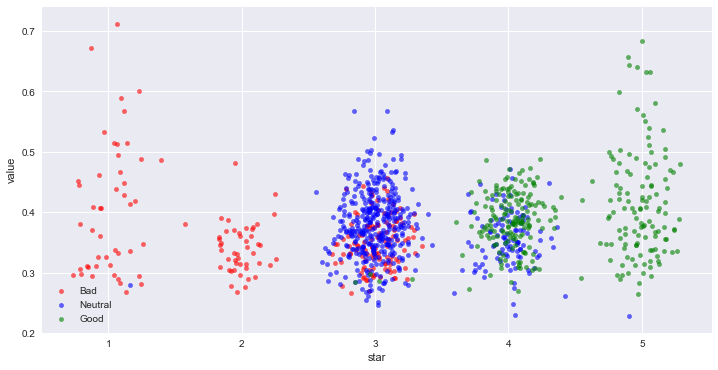

In [25]:
x = (s.values.astype(np.int16) +
     np.random.normal(scale=0.15, size=len(normalized)))
df = pd.DataFrame({'star': x, 
                   'value': v.values,
                   'group': normalized['group']})

ax = df[df.group=='Bad'].plot.scatter(x='star', y='value', color='r', label='Bad', figsize=(12, 6), alpha=0.6)
df[df.group=='Neutral'].plot.scatter(x='star', y='value', color='b', label='Neutral', ax=ax, alpha=0.6)
df[df.group=='Good'].plot.scatter(x='star', y='value', color='g', label='Good', ax=ax, alpha=0.6);

### Conclusions

* Python is a well suite language to do science
* Jupyter notebook, Pandas and Matplotlib are great tools to make data exploratory 
* If we can introduce ourselves to Machine Learning, take a look on sklearn (and AstroML for astronomous related things)

### Thanks! Questions?

If you want to keep in touch:

* arielrossanigo@gmail.com
* @arielrossanigo
* https://github.com/arielrossanigo